In [1]:
import numpy as np
from scipy.linalg import eig 
import mdptoolbox, mdptoolbox.example
import random
from numpy.random import seed
import time


def get_next_state(state,action):
    if state == 0:
        return state + action
    if state == 1:
        if action ==0:
            return 0
        else:
            return 1

def feature_state(thetha,state):
    if state == 0:
        return thetha
    if state == 1:
        return 2*thetha

def grad_state(state):
    if state == 0:
        return 1
    if state == 1:
        return 2
    
total_runs = 10
total_iterations = 100000

step_size = 0.01

alpha = step_size
beta = 10*alpha

error_storage_td = np.zeros((total_runs,total_iterations))
error_storage_ptd = np.zeros((total_runs,total_iterations))
error_storage_etd = np.zeros((total_runs,total_iterations))
error_storage_gtd = np.zeros((total_runs,total_iterations))

opt = np.array([[0,0]])

for runs in range(total_runs):
    
    np.random.seed((runs+1)*100)
    random.seed((runs+1)*110)
    
    pi = np.array([[0,1],[0,1]])
    mu = np.array([[0.5,0.5],[0.5,0.5]])
    d_mu = np.array([[0.5,0.5]])
    thetha = 1
    discount = 0.9
    P_pi= np.array([[0,1],[0,1]])
    eta = 1 #max(np.max(discount * np.dot(d_mu,P_pi)/d_mu) - 1, 0)
    F=1
    thetha_ETD = 1
    thetha_td = 1
    thetha_GTD = 1
    w = 0
    
    state = 0

    for main_iter in range(total_iterations):
        action = np.random.choice(2,1,p=[0.5,0.5])[0]
        importance_sampling = pi[state,action]/mu[state,action]  
        importance_sampling_gtd = pi[state,action]
        next_state = get_next_state(state,action)
        thetha = thetha + importance_sampling*step_size*(discount*feature_state(thetha,next_state) - (1+eta)*feature_state(thetha,state))*grad_state(state)
        thetha_ETD = thetha_ETD + F*importance_sampling*step_size*(discount*feature_state(thetha_ETD,next_state) - feature_state(thetha_ETD,state))*grad_state(state)
        
        delta = 0 + discount*feature_state(thetha_GTD,next_state) - feature_state(thetha_GTD,state)
        
        #thetha_GTD = thetha_GTD + alpha*feature_state(w,state)*(grad_state(state)- discount*grad_state(next_state))
        thetha_GTD = thetha_GTD + alpha*importance_sampling_gtd*(delta*grad_state(state) - discount*feature_state(w,state)*grad_state(next_state))
        w = w + beta*importance_sampling_gtd*(delta - feature_state(w,state))*grad_state(state)
        
        
        
        thetha_td = thetha_td + importance_sampling*step_size*(discount*feature_state(thetha_td,next_state) - feature_state(thetha_td,state))*grad_state(state)
        F = 1+ discount*importance_sampling*F 
        state = next_state
        
        v_ptd = np.zeros((2,1))
        v_etd = np.zeros((2,1))
        v_td =  np.zeros((2,1))
        v_gtd =  np.zeros((2,1))

        
        for i in range(2):
            v_ptd[i,0] = feature_state(thetha,i)
            v_etd[i,0] = feature_state(thetha_ETD,i)
            v_td[i,0] = feature_state(thetha_td,i)
            v_gtd[i,0] = feature_state(thetha_GTD,i)
        
        error_storage_ptd[runs,main_iter] = np.sqrt(np.sum(np.multiply(d_mu.T,np.square(opt.T - v_ptd))))
        error_storage_etd[runs,main_iter] = np.sqrt(np.sum(np.multiply(d_mu.T,np.square(opt.T - v_etd))))
        error_storage_td[runs,main_iter] = np.sqrt(np.sum(np.multiply(d_mu.T,np.square(opt.T - v_td))))
        error_storage_gtd[runs,main_iter] = np.sqrt(np.sum(np.multiply(d_mu.T,np.square(opt.T - v_gtd))))

#print(thetha,thetha_ETD)


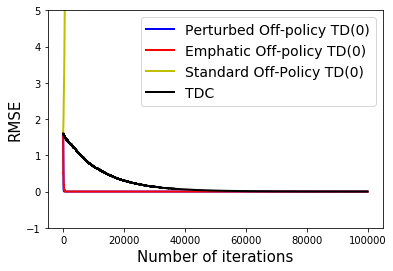

In [3]:
import matplotlib.pyplot as plt
plt.plot(np.average(error_storage_ptd,axis = 0), 'b',linewidth = 2, label = 'Perturbed Off-policy TD(0)')
plt.plot(np.average(error_storage_etd,axis = 0), 'r',linewidth = 2, label = 'Emphatic Off-policy TD(0)')
plt.plot(np.average(error_storage_td,axis = 0), 'y',linewidth = 2, label = 'Standard Off-Policy TD(0)')
plt.plot(np.average(error_storage_gtd,axis = 0), 'k',linewidth = 2, label = 'TDC')
plt.ylim([-1,5])

plt.legend(loc = 'upper right',prop={'size': 14})
plt.xlabel('Number of iterations',fontsize = 15)
plt.ylabel('RMSE',fontsize = 15)
plt.show()

In [1]:
import matplotlib.pyplot as plt
for i in range(50):
    plt.plot(error_storage_ptd[i],'c',linewidth = 2)
plt.plot(np.average(error_storage_ptd,axis = 0), 'k',linewidth = 2, label = 'Average performance')

#plt.xlim([0,10])
plt.ylim([-0.01,0.05])

plt.legend(loc = 'upper right',prop={'size': 14})
plt.xlabel('Number of iterations',fontsize = 15)
plt.ylabel('RMSE',fontsize = 15)
plt.show()

NameError: name 'error_storage_ptd' is not defined

In [4]:
eta

1